 <div class="alert alert-block alert-info"><b>Presentado por:</b> <em>Wilmer Ropero Castaño - Jairo Arturo Moran Burgos. Universidad de Antioquía, Maestría en Ingeniería.</em></div>

 <div class="alert alert-block alert-success"><b>Curso:</b> <em>Statistical Learning Data. Universidad de Antioquía, 2020-1. Medellín, Colombia.</em></div>

# Modelos Aditivos Generalizados -GAM- son modelos semiparámetricos suavizados de la forma:

<br>



<div class="math notranslate nohighlight">
\[g(\mathbb{E}[y|X]) = \beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\]</div>
<p>Donde <code class="docutils literal notranslate"><span class="pre">X.T</span> <span class="pre">=</span> <span class="pre">[X_1,</span> <span class="pre">X_2,</span> <span class="pre">...,</span> <span class="pre">X_N]</span></code> son las variables independientes, <code class="docutils literal notranslate"><span class="pre">y</span></code> es la variable dependiente, y <code class="docutils literal notranslate"><span class="pre">g()</span></code> es la función de enlace que relaciona nuestras variables predictoras con el valor esperado de la variable dependiente.</p>
<p>La función caracteristica <code class="docutils literal notranslate"><span class="pre">f_i()</span></code> se construyen usando <strong>splines B penalizadas</strong>, que nos pérmiten modelar <strong>automáticamente relaciones no lineales</strong> sin tener que probar manualmente muchas transformaciones diferentes en cada variable.</p>
<p><img alt="Basis splines" src="https://pygam.readthedocs.io/en/latest/_images/pygam_basis.png" width="500" height="80"/></p>
<p>Los GAM amplían los modelos lineales generalizados permitiendo funciones no lineales de las características mientras mantienen la adicionalidad. Dado que el modelo es aditivo, es fácil examinar el efecto de cada  <code class="docutils literal notranslate"><span class="pre">X_i</span></code> en <code class="docutils literal notranslate"><span class="pre">Y</span></code> de forma individual, manteniendo todos los demás predictores constantes.</p>
<p>El resultado es un modelo muy flexible, donde es fácil incorporar conocimientos previos y control de sobreajuste..</p>
</div>

<br>
<div class="section" id="Generalized-Additive-Models,-in-general">
<h2>GAM,en general:</h2>
<div class="math notranslate nohighlight">
\[y \sim ExponentialFamily(\mu|X)\]</div>
<p>donde</p>
<div class="math notranslate nohighlight">
\[g(\mu|X) = \beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\]</div>
<p>Entonces, GAM tien 3 componentes:</p>
<ul class="simple">
<li><code class="docutils literal notranslate"><span class="pre">Una distribución</span></code> de la familia exponencial (normal, binomial, poisson, gamma, inv_gauss)</li>
<li><code class="docutils literal notranslate"><span class="pre">Una función </span> <span class="pre">de enlace</span></code> <span class="math notranslate nohighlight">\(g(\cdot)\)</span></li>
<li><code class="docutils literal notranslate"><span class="pre">forma funcional </span> <span class="pre">con estructura aditiva</span></code> <span class="math notranslate nohighlight">\(\beta_0 + f_1(X_1) + f_2(X_2, X3) + \ldots + f_M(X_N)\)</span></li>
</ul>
    
<div class="section" id="Generalized-Additive-Models,-in-general">
    <h2>Referencias</h2>
</div>
<ul>
<li>Green, P. J., & Silverman, B. W. (1993). Nonparametric regression and generalized linear models: a roughness penalty approach. Chapman and Hall/CRC.</li>
<li>Hastie, T. and Tibshirani, R. (1990). Generalized Additive Models, volume 43. CRC Press, 1990.</li>
<li>Wood, S. N. (2017). Generalized additive models: an introduction with R. Chapman and Hall/CRC.</li>
<li>Hastie, T., and Tibshirani, R. (1987). Generalized additive models: some applications. Journal of the American Statistical Association, 82(398), 371-386.</li>
    <li><a href = "https://cran.r-project.org/package=gam">https://cran.r-project.org/package=gam</a></li>
    <li><a href="https://cran.r-project.org/package=mgcv">https://cran.r-project.org/package=mgcv</a></li>
<li><a href="https://www.statsmodels.org/stable/gam.html">https://www.statsmodels.org/stable/gam.html</a></li>
    <li><a href="https://pygam.readthedocs.io/">https://pygam.readthedocs.io/</a></li>
    <li><a href="https://github.com/dswah/PyData-Berlin-2018-pyGAM/">https://github.com/dswah/PyData-Berlin-2018-pyGAM/</a></li>
</ul>
    
    

# Ejemplos


<div class="alert alert-block alert-warning"><b>Ejemplos:</b> A continuación se pretende presentar dos ejemplos, uno para el tipo <b>regresión</b> y el otro para el tipo <b>clasificación</b>.</div>
    
    
   

## Se importan las librerías necesarías.

In [1]:
#!pip install pygam
import sys
import pygam
import numpy as np
import pandas as pd        
from pygam import LinearGAM, LogisticGAM, l, s, f, te
from pygam import utils as gamutils
from pygam.datasets import default
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt



if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

plt.style.use('ggplot')
%matplotlib inline

## Primero veamos el efecto del suavizado (smoothing &#955;)

 <div class="alert alert-block alert-info">Se crea una señal que va creciendo sinusoidalmente.<em> Para efectos del ejemplo</em></div>

Veamos X:
 [0.         0.01002004 0.02004008 0.03006012 0.04008016 0.0501002
 0.06012024 0.07014028 0.08016032 0.09018036] ......lista con longitud 500 valores 

Veamos y:
 [ 0.49456224  0.88979649  0.01735126 -0.67245028 -0.11504995  1.13556736
 -1.04814728  1.28249769 -0.03063439  0.63546677] ......lista con longitud 500 valores


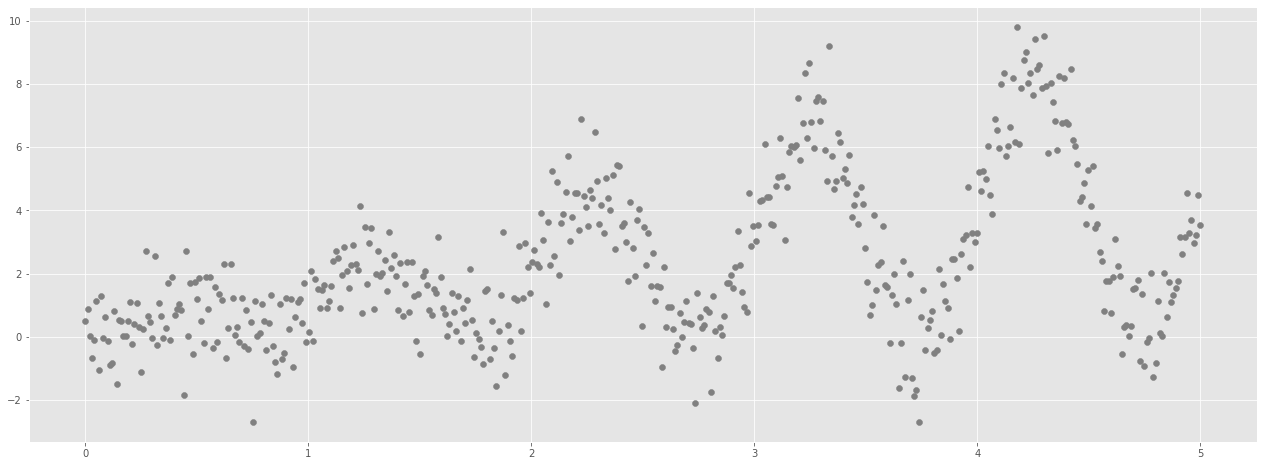

In [2]:
x = np.linspace(0, 5, 500) #Generamos un vector X (numpy.linspace(start, stop, num=500))
print("Veamos X:\n",x[:10], f'......lista con longitud {len(x)} valores \n')

y = np.sin(x * 2 * np.pi)*x + x + np.random.randn(len(x)) #Generamos una función sinosoidal 
print("Veamos y:\n", y[:10], f'......lista con longitud {len(y)} valores')

plt.rcParams['figure.figsize'] = (22, 8)
plt.scatter(x,y,color='gray')

## &#955; alto.

<div class="alert alert-block alert-warning"><b>Fuerza del suavizado &#955; alta :</b> A continuación se selecciona un suavizado o penalización de 1+e6. Note que se ha pérdido la flexibilidad del modelo, se ha generado una línea recta.</div>

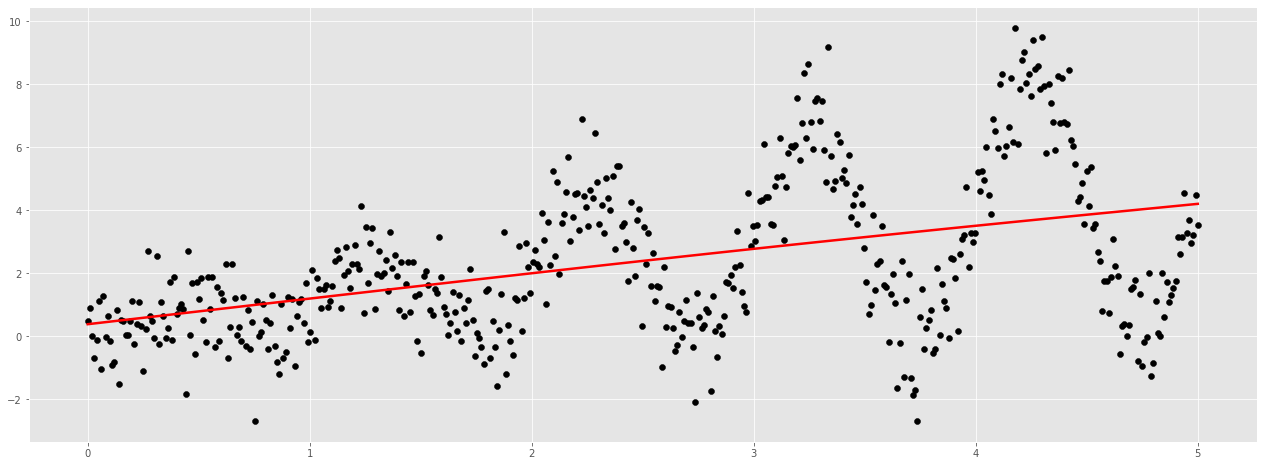

In [3]:
"""Ejecutamos un módelo lineal de GAM"""
gam = LinearGAM(lam=1e6, n_splines=50).fit(x, y)

"""Generamos el gráfico de dispersión."""
XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'red', linewidth=2.5)
plt.scatter(x, y, color='black')



In [4]:

gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.1141
Link Function:                     IdentityLink Log Likelihood:                                   -1304.38
Number of Samples:                          500 AIC:                                             2614.9882
                                                AICc:                                            2615.0399
                                                GCV:                                                4.9319
                                                Scale:                                              4.8944
                                                Pseudo R-Squared:                                    0.205
Feature Function                  Lam

## &#955; bajo.

<div class="alert alert-block alert-warning"><b>Fuerza del suavizado &#955; baja :</b> A continuación se selecciona un suavizado o penalización de 1-e6. Note que ahora el módelo es muy flexible.</div>

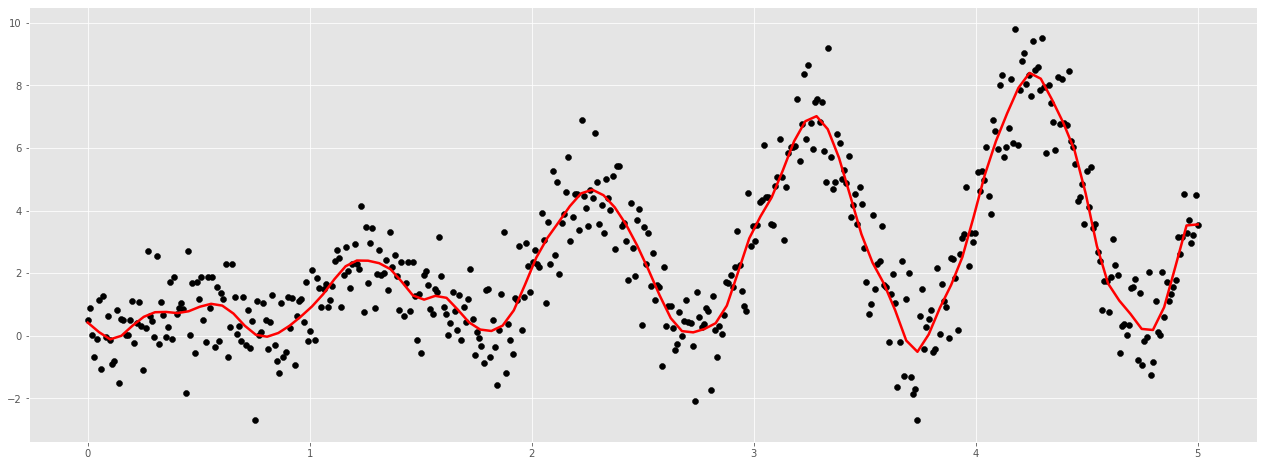

In [5]:
gam = LinearGAM(lam=1e-6, n_splines=50).fit(x, y)

XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'r', linewidth=2.5)
plt.scatter(x, y, color='black')

In [6]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.9993
Link Function:                     IdentityLink Log Likelihood:                                   -687.281
Number of Samples:                          500 AIC:                                             1476.5608
                                                AICc:                                            1488.3997
                                                GCV:                                                1.2293
                                                Scale:                                              1.0102
                                                Pseudo R-Squared:                                   0.8517
Feature Function                  Lam

## &#955; Óptimo.

 <div class="alert alert-block alert-success"><b>Suavizado óptimo:</b> Para seleccionar el valor correcto de suavizado , se utiliza <b><em>gridsearch, para que el módelo elija en un espacio de busqueda!</em></b>.</div>

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


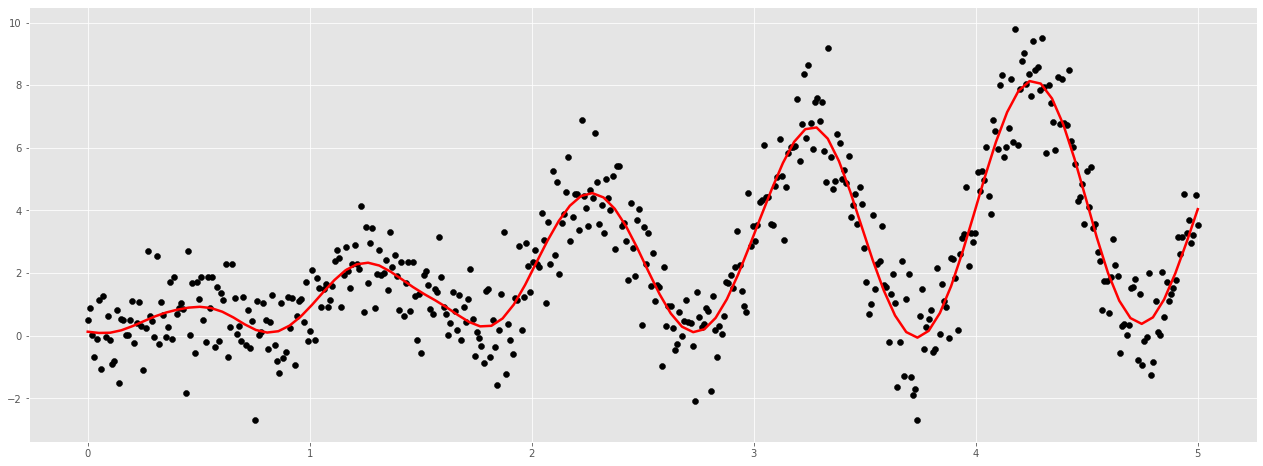

In [7]:
"""Se crea un espacio de busqueda para que el módelo escoja el mejor valor """
lams = np.logspace(-4, 100, 100)
gam = LinearGAM(n_splines=50).gridsearch(x[:,None], y, lam=lams)


XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(XX, gam.predict(XX), 'r', linewidth=2.5)
plt.scatter(x, y, color='black')

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     24.0221
Link Function:                     IdentityLink Log Likelihood:                                   -693.952
Number of Samples:                          500 AIC:                                             1437.9482
                                                AICc:                                            1440.6957
                                                GCV:                                                1.0796
                                                Scale:                                              0.9866
                                                Pseudo R-Squared:                                   0.8468
Feature Function                  Lam

# Problema de regresión (GAMs)

 Se utiliza la función para regresiones líneales de pyGAM. Útiliza una función enlace de indentidad y una distribución normal.
<br><br>
$$\mathbb{E}[y|X]=\beta_0+f_1(X_1)+f_2(X_2,X_3)+ \dots +f_M(X_N) \\
\vdots \\
\mathbb{E}[y|X]=\beta_0+f_1(X_1)+f_2(X_2)+ \dots +f_M(X_N)
$$

### Determinación de la calidad del vino portugues

 <div class="alert alert-block alert-info">Este conjunto de datos trata de variantes rojas del vino portugués <em>"Vinho Verde"</em>, disponibles en el repositorio de <em>"Machine Learning"</em> UCI. Las características de entrada son 11 variables fisicoquímicas que describen las variantes de vino tinto desde varios aspectos. </em></div>

<div class="alert alert-block alert-warning"><b>Variable objetivo:</b> El objetivo es la <b><em>puntuación de calidad</em></b>, que va de 0 a 10, que indica lo bueno que es el vino tinto.</div>

### Preparando los datos

In [9]:
redwine_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv'
redwine = pd.read_csv(redwine_url)
print("Cantidad de datos: ",len(redwine),"observaciones")

Cantidad de datos:  1599 observaciones


In [10]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
redwine_X = redwine.drop(['quality'], axis=1).values # Saco la variable objetivo del DataSet.
redwine_y = redwine['quality'] # Variable objetivo. Calidad del vino.

### Usamos la función <em>gridsearch()</em> para el suavizado

In [12]:
lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:17 Time:  0:00:17


<Figure size 1584x576 with 0 Axes>

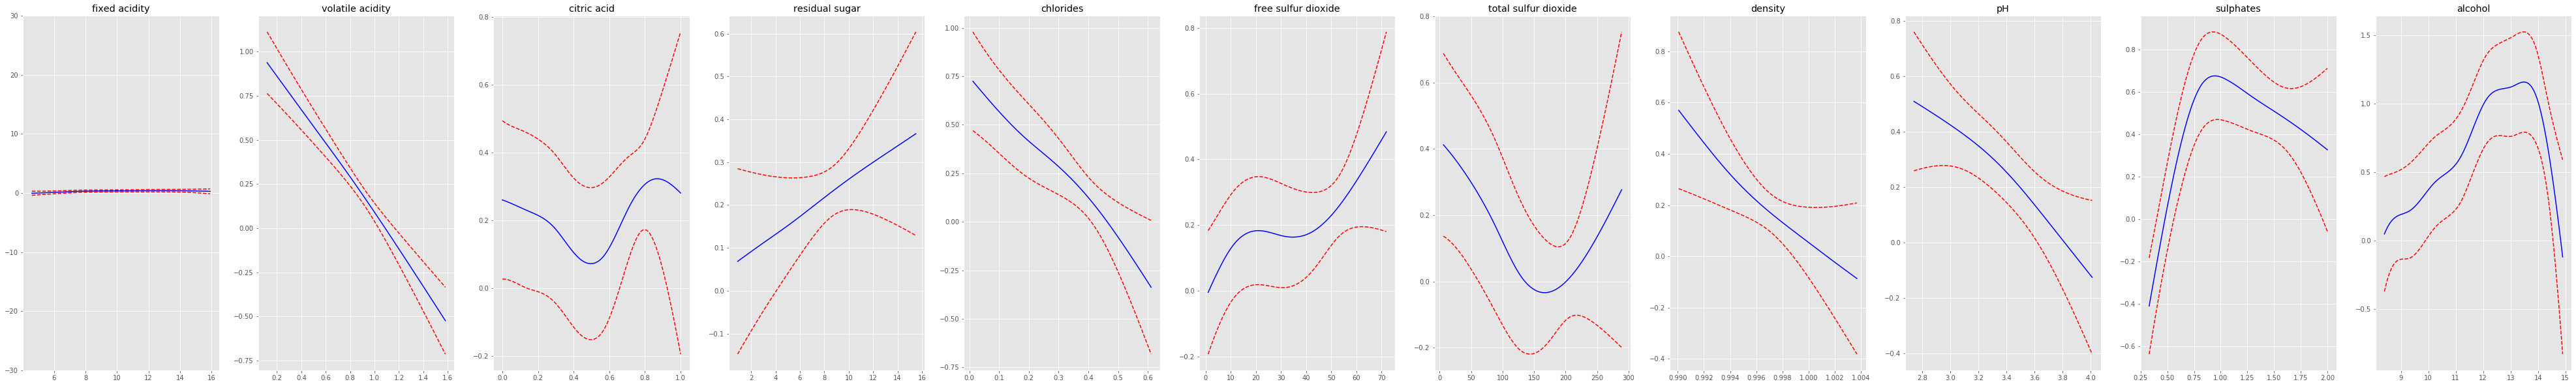

In [13]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(70, 10))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX),c='b')
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])



In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      31.806
Link Function:                     IdentityLink Log Likelihood:                                 -1969.7711
Number of Samples:                         1599 AIC:                                             4005.1542
                                                AICc:                                            4006.5713
                                                GCV:                                                0.4077
                                                Scale:                                              0.3931
                                                Pseudo R-Squared:                                   0.4088
Feature Function                  Lam

<div class="alert alert-block alert-warning"><b>Prueba del módelo:</b> Separamos para hacer el test y para entrenar...el tamaño seleccionado para realizar el test es el 20% de las variables. </div>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(redwine_X, redwine_y, test_size=0.2, random_state=42)


gam = LinearGAM(n_splines=20).gridsearch(X_train, y_train,lam=lams)
gam.summary()

100% (100 of 100) |######################| Elapsed Time: 0:00:34 Time:  0:00:34


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     62.3524
Link Function:                     IdentityLink Log Likelihood:                                 -1534.0701
Number of Samples:                         1279 AIC:                                             3194.8449
                                                AICc:                                            3201.5578
                                                GCV:                                                0.4225
                                                Scale:                                              0.3856
                                                Pseudo R-Squared:                                   0.4362
Feature Function                  Lam

<div class="alert alert-block alert-warning"><b>Realizando el test:</b> Si bien anteriormente se selecciono el 20% de las variables, para efectos del ejemplo y para poder visualizar mejor la gráfica, se realiza la predicción de 100 datos de la variable X_test. </div>

Text(0.5, 1.0, 'Intervalo de confianza del 95.00 %')

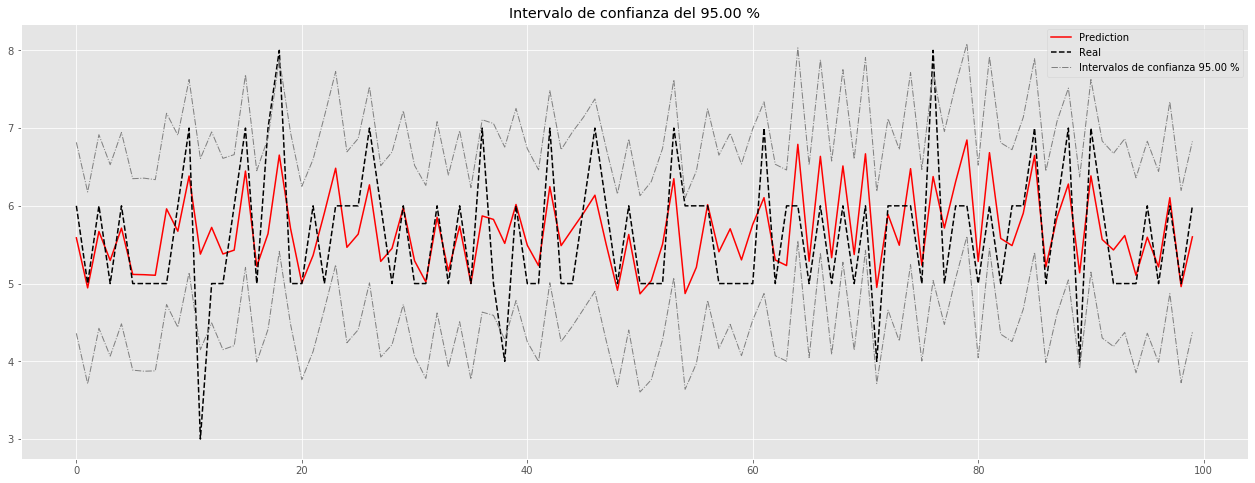

In [16]:
"""Tomo 100 valores para predecir"""
predictions = gam.predict(X_test[:100])
xsa = range(len(predictions))

IC=0.95 # Intervalo de confianza
plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(xsa, predictions, 'r', xsa, y_test[:100], '--k', lw = 1.5)
plt.plot(xsa, gam.prediction_intervals(X_test[0:100], width=IC), color='gray', ls='-.', lw=1)
plt.legend(('Prediction', 'Real', f'Intervalos de confianza {IC*100:.2f} %'))
plt.title(f"Intervalo de confianza del {IC*100:.2f} %")

<div class="alert alert-block alert-warning"><b>Preparando resultados:</b> Preparo la información para mostrar  la predicción en un DataFrame. Se adiciona la columna del error. </div>

In [17]:
y_test        = pd.DataFrame(y_test).reset_index(drop=True)
y_predictions = pd.DataFrame(predictions).reset_index(drop=True)

table_predict = pd.concat([y_test ,y_predictions],axis=1)
table_predict.columns = ['Calidad_real','Calidad_predecida']

#REdondeo la calidad predecida
for i in range(len(table_predict)):
    table_predict.loc[:,'Calidad_predecida'] = round(table_predict.loc[:,'Calidad_predecida'] ,1)

#Cálculo el error
table_predict['error %']=abs(round(((table_predict['Calidad_real'] - 
                                   table_predict['Calidad_predecida'])/
                                  table_predict['Calidad_real'])*100,1))

print("Error máximo", max(table_predict.loc[:99,'error %']),"%")
print("Error Promedio", round(sum(table_predict.loc[:99,'error %'].values.tolist())/100,1),"%")



Error máximo 80.0 %
Error Promedio 9.3 %


 <div class="alert alert-block alert-success"><b>Resultado de la predicción:</b> A continuación se presenta el resultado, en la mayoria de los casos se logra una buena aproximación para la calidad del vino, con un <em><b>error promedio de 9.3% </b></em>, sin embargo, <em><b>tenemos casos con errores de predicción altos!</em></b>.</div>

In [18]:
table_predict.loc[:11,]

,Calidad_real,Calidad_predecida,error %
0,6,5.6,6.7
1,5,4.9,2.0
2,6,5.7,5.0
3,5,5.3,6.0
4,6,5.7,5.0
5,5,5.1,2.0
6,5,5.1,2.0
7,5,5.1,2.0
8,5,6.0,20.0
9,6,5.7,5.0


# Problema de clásificación (GAMs)

Se utiliza la función para problemas de clasificación de pyGAM, LogisticGAM. Utiliza una función de enlace logaritmica y una distribución binomial.
<br><br>
$$log\left ( \frac{P(y=1|X)}{P(y=0|X)} \right ) =\beta_0+f_1(X_1)+f_2(X_2,X_3)+ \dots +f_M(X_N) \\
\vdots \\
log\left ( \frac{P(y=1|X)}{P(y=0|X)} \right ) =\beta_0+f_1(X_1)+f_2(X_2)+ \dots +f_M(X_N)
$$

# Detección de cancer de seno

 <div class="alert alert-block alert-info">El conjunto de datos tiene 30 carácteristicas para las imagenes de las glandulas mamarías. Además el registro se encuentra etiquetado como maligno (M) o benigno (B). </div>

# Preparando los datos

In [19]:
tumors_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/tumors.csv'
tumors = pd.read_csv(tumors_url)

print(f"Hay un total de {len(tumors)} observaciones")

Hay un total de 569 observaciones


In [20]:
tumors.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Se quita la columna de identificación de los datos.
tumors = tumors.drop(['id'],axis=1)
tumors.loc[tumors['diagnosis']=='M','diagnosis'] =1 #Se cambia la variable a tipo binario.
tumors.loc[tumors['diagnosis']=='B','diagnosis'] =0 #
tumors_X = tumors.iloc[:,:11].drop(['diagnosis'], axis=1).values #Separamos las variables independientes
tumors_y = tumors['diagnosis'] #Separamos las variables dependientes.

In [22]:
gam = LogisticGAM(n_splines=10).gridsearch(tumors_X, tumors_y)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     24.8409
Link Function:                        LogitLink Log Likelihood:                                   -41.8984
Number of Samples:                          569 AIC:                                              133.4787
                                                AICc:                                             136.0373
                                                UBRE:                                               2.2695
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8885
Feature Function                  Lam

In [23]:
print('La precisión del módelo es:',round(gam.accuracy(tumors_X, tumors_y)*100,2),"%")

La precisión del módelo es: 97.19 %


<Figure size 1584x576 with 0 Axes>

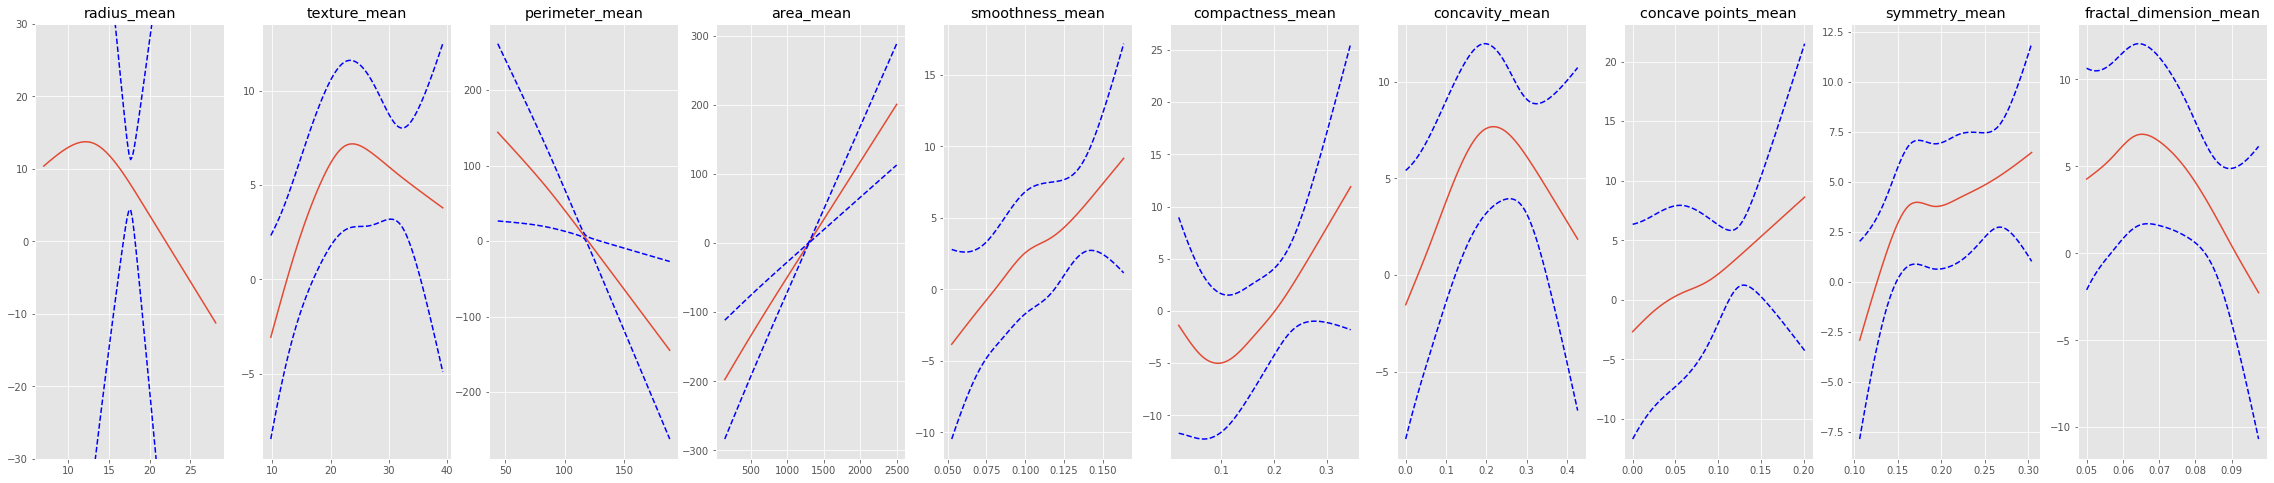

In [24]:
titles = tumors.columns[1:11]
plt.figure()
fig, axs = plt.subplots(1,10,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='b', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

<div class="alert alert-block alert-warning"><b>Prueba del módelo:</b> Separamos para hacer el test y para entrenar...el tamaño seleccionado para realizar el test es el 20% de las variables. </div>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(tumors_X, tumors_y, test_size=0.2, random_state=42)

gam = LogisticGAM().gridsearch(X_train, y_train)
gam.summary()


100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     16.7264
Link Function:                        LogitLink Log Likelihood:                                   -44.6011
Number of Samples:                          455 AIC:                                              122.6549
                                                AICc:                                             124.1767
                                                UBRE:                                                2.299
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8514
Feature Function                  Lam

In [26]:
print('La precisión del módelo es:',round(gam.accuracy(tumors_X, tumors_y)*100,2),"%")

La precisión del módelo es: 95.61 %


<div class="alert alert-block alert-warning"><b>Realizando el test:</b> Se presenta una gráfica para las variables que se han predecido, donde "0" es Benigno (B) y "1" es Maligno (M). </div>

Text(0.5, 1.0, '"0" es Benigno (B) y "1" es Maligno (M)')

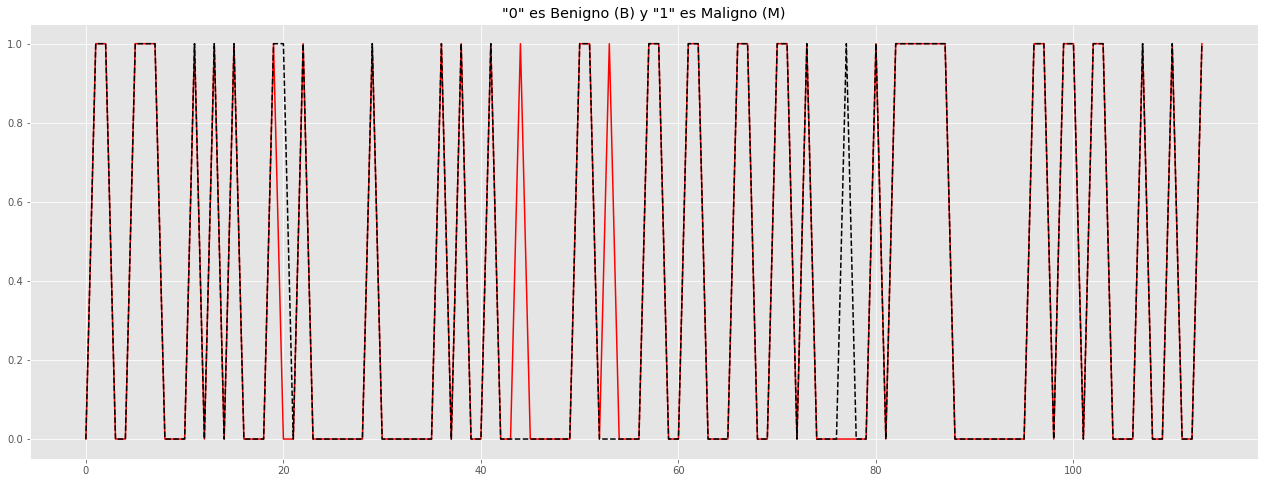

In [27]:

predictions = gam.predict(X_test)
xsa = range(len(predictions))

plt.rcParams['figure.figsize'] = (22, 8)
plt.plot(xsa, predictions, 'r', xsa, y_test, '--k', lw = 1.5)
plt.title('"0" es Benigno (B) y "1" es Maligno (M)')

<div class="alert alert-block alert-warning"><b>Preparando resultados:</b> Preparo la información para mostrar  la predicción realizada por el modelo. </div>

In [28]:
y_test        = pd.DataFrame(y_test).reset_index(drop=True)
y_predictions = pd.DataFrame(predictions).reset_index(drop=True)


table_predict = pd.concat([y_test ,y_predictions],axis=1)
table_predict.columns = ['Real','Predecido']

for j in range(len(table_predict)):
    if table_predict.iloc[j,0]==0: 
        table_predict.iloc[j,0] =False 
    else: 
        table_predict.iloc[j,0] =True

table_predict['¿Bien?']= table_predict['Real']==table_predict['Predecido']

 <div class="alert alert-block alert-success"><b>Resultado de la predicción:</b> A continuación se presenta el resultado para la calsificación según la imagen si el tumor es Benigno (B) o es Maligno (M). Al separar los datos para entrenamiento y prueba (114 observaciones) se obtiene que el módelo ha acertado en la mayoria de observaciones y se ha equivocado solo en el 3.5% (4 observaciones).</div>

In [29]:
print("Se han clasificado mal el ",round(((table_predict.groupby(['¿Bien?']).count().iloc[0,0])/
                                          len(table_predict))*100,1),"%","de las observaciones")


Se han clasificado mal el  3.5 % de las observaciones


In [30]:
table_predict

,Real,Predecido,¿Bien?
0,False,False,True
1,True,True,True
2,True,True,True
3,False,False,True
4,False,False,True
...,...,...,...
109,False,False,True
110,True,True,True
111,False,False,True
112,False,False,True
